In [1]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
sys.path.append(os.path.abspath('.')) #for current preprocessing
# %load_ext autoreload
# %autoreload 2 # changes in script will be immediately applied

import preprocessing_all_data_v03_1 as pad


os.chdir(pad.working_dir())

Populating the interactive namespace from numpy and matplotlib


# Вызов генерации фич

In [2]:
# перечислил все категории, по которым можно сплитовать

categorical_hierahies = [['State', 'Town', u'Agencia_ID'],
                         [ u'Canal_ID'],
                         [u'Ruta_SAK'], 
                         [u'Cliente_ID'], 
                         ['brand', u'Producto_ID']]

In [5]:
reload(pad)

data = pad.preproc(states=['Queretaro de Arteaga'])
data.head()

file was splitted into 9 parts by product
1 parts of lags were calculated
2 parts of lags were calculated
3 parts of lags were calculated
4 parts of lags were calculated
5 parts of lags were calculated
6 parts of lags were calculated
7 parts of lags were calculated
8 parts of lags were calculated
9 parts of lags were calculated


,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Producto_ID,Ruta_SAK,Semana,State,Town,...,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK_6mean,No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK_6mean,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_6mean,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_6mean,Log_Demanda_Mean_Producto_ID_Ruta_SAK_6mean,No_remains_Mean_Producto_ID_Ruta_SAK_6mean,Log_Demanda_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_6mean,No_remains_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_6mean,Log_Demanda_Mean_Producto_ID_Cliente_ID_Town_6mean,No_remains_Mean_Producto_ID_Cliente_ID_Town_6mean
790,1232,1,66619,4.0,0.0,1129,1001,3,Queretaro de Arteaga,2059 Queretaro Balvanera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,1232,1,66619,1.0,0.0,1146,1001,3,Queretaro de Arteaga,2059 Queretaro Balvanera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,1232,1,94125,10.0,0.0,1109,1001,3,Queretaro de Arteaga,2059 Queretaro Balvanera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,1232,1,94125,20.0,0.0,1125,1001,3,Queretaro de Arteaga,2059 Queretaro Balvanera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,1232,1,94125,3.0,0.0,1129,1001,3,Queretaro de Arteaga,2059 Queretaro Balvanera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cur_week_features = [u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered', 'Log_Dev_proxima', 'Log_Dev_uni_proxima', 'Log_Venta_hoy']
cur_week_features = [x for x in cur_week_features if x in data.columns]


means_by_split = [x for x in data.columns if 'Mean' in x and not(x[-2] == '_' or x[-4:] == 'mean')] #its mean, its not a lag
data_for_model = data.drop(cur_week_features + means_by_split, axis=1).set_index(u'Semana')
print('Drop', str(cur_week_features+ means_by_split))

X_train = data_for_model.loc[list(range(3,8)),:].drop('Log_Demanda', axis=1)
y_train = data_for_model.loc[list(range(3,8)),:]['Log_Demanda']
X_test = data_for_model.loc[list(range(8,10)),:].drop('Log_Demanda', axis=1)
y_test = data_for_model.loc[list(range(8,10)),:]['Log_Demanda']
X_train.head()

Drop [u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', u'Venta_hoy_by_uni', 'Log_Dev_proxima', 'Log_Dev_uni_proxima', 'Log_Venta_hoy', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'No_remains_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID', 'No_remains_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Canal_ID_Ruta_SAK', 'No_remains_Mean_Producto_ID_Cliente_ID_Canal_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_Ruta_SAK', 'No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'No_remains_Mean_Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'Log_Demanda_Mean_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'No_remains_Mean_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Cli

,Agencia_ID,Canal_ID,Cliente_ID,Producto_ID,Ruta_SAK,brand,weight,pieces,Demanda_uni_equil_1,Dev_proxima_1,...,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK_6mean,No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK_6mean,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_6mean,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_6mean,Log_Demanda_Mean_Producto_ID_Ruta_SAK_6mean,No_remains_Mean_Producto_ID_Ruta_SAK_6mean,Log_Demanda_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_6mean,No_remains_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_6mean,Log_Demanda_Mean_Producto_ID_Cliente_ID_Town_6mean,No_remains_Mean_Producto_ID_Cliente_ID_Town_6mean
Semana,,,,,,,,,,,,,,,,,,,,,
3,1232,1,66619,1129,1001,39,510.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1232,1,66619,1146,1001,3,675.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1232,1,94125,1109,1001,3,360.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1232,1,94125,1125,1001,39,255.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1232,1,94125,1129,1001,39,510.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# xgboost

In [21]:
import xgboost as xgb
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

# param = clf.best_params_
param = {
 'learning_rate': 0.3,
 'gamma': 1,
 'max_depth': 16,
 'min_child_weight': 18,
 'n_estimators': 10, # 100,
#  'early_stopping_rounds': 10,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
#  'tree_method': 'approx',
 'nthread':-1
}

xgb_model = xgb.XGBRegressor()
xgb_model.set_params(**param)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=1, learning_rate=0.3, max_delta_step=0, max_depth=16,
       min_child_weight=18, missing=None, n_estimators=10, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

Train: 0.383610631889
Test whole set: 0.360919727669
Test 8 week: 0.367677676587
Test 9 week: 0.353964208895


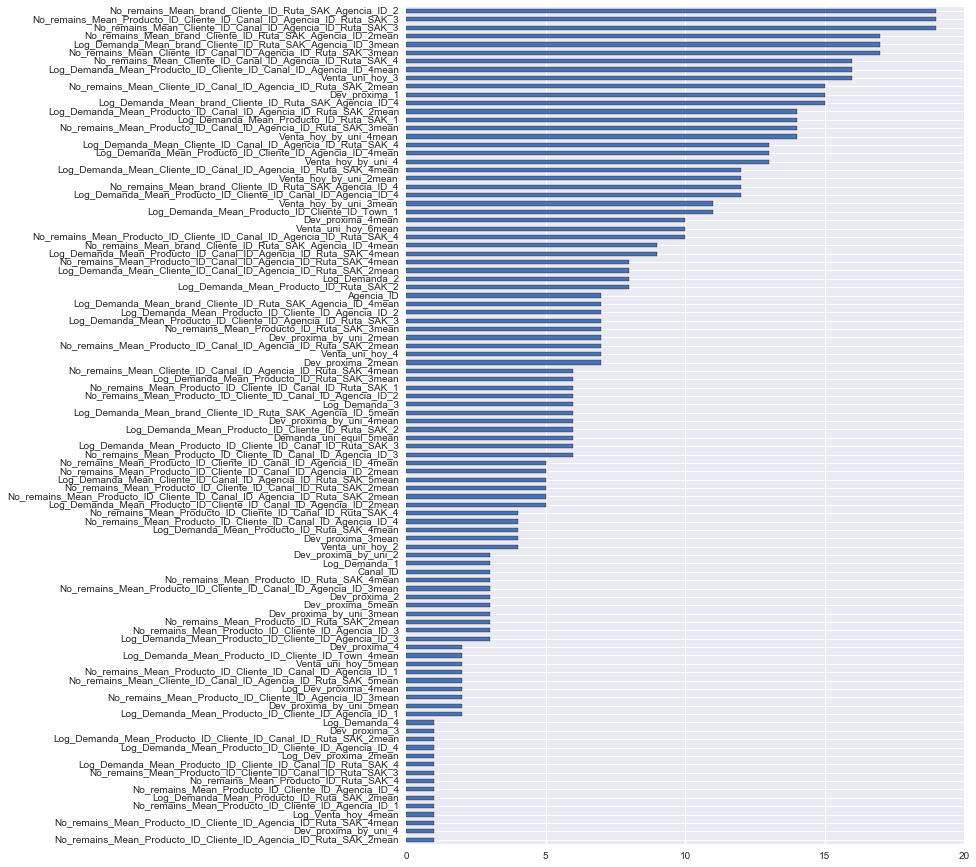

In [22]:
feat_imp = pd.Series(xgb_model.booster().get_fscore()).sort_values()
feat_imp.head(100).plot.barh(figsize=(10,15))

print('Train:', np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train))))
print('Test whole set:', np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test))))
print('Test 8 week:', np.sqrt(mean_squared_error(y_test.loc[8], xgb_model.predict(X_test.loc[8]))))
print('Test 9 week:', np.sqrt(mean_squared_error(y_test.loc[9], xgb_model.predict(X_test.loc[9]))))

Посмотрим на то, какие из трансформаций оказались хорошими

In [27]:
def transformaton_types(feat_list):
    features = pd.DataFrame(feat_list, columns = ['Features'])
    features['Original'] = features['Features']
    features['LagWidth'] = features['Features'].str.extract('(\d)mean', expand=True)
    features.loc[~features.LagWidth.isnull(), 'Original'] = features['Original'].str.replace('_(\d)mean', '')
    features['Lag'] = features.loc[features.LagWidth.isnull(), 'Features'].str.extract('_(\d)', expand=True)
    features.loc[~features.Lag.isnull(), 'Original'] = features['Original'].str.replace('_(\d)', '')
    features['Split'] = features['Original'].apply(lambda f: f.split('_Mean_')[1] if '_Mean_' in f else np.nan)
    features['Original'] = features['Original'].apply(lambda f: f.split('_Mean_')[0])
    return features


features = transformaton_types(feat_imp.index)
features['Important'] = features['Features'].isin(feat_imp.head(50).index).astype(int)
features

,Features,Original,LagWidth,Lag,Split,Important
0,No_remains_Mean_Producto_ID_Cliente_ID_Agencia...,No_remains,2,NaN,Producto_ID_Cliente_ID_Agencia_ID_Ruta_SAK,1
1,Dev_proxima_by_uni_4,Dev_proxima_by_uni,NaN,4,NaN,1
2,No_remains_Mean_Producto_ID_Cliente_ID_Agencia...,No_remains,4,NaN,Producto_ID_Cliente_ID_Agencia_ID_Ruta_SAK,1
3,Log_Venta_hoy_4mean,Log_Venta_hoy,4,NaN,NaN,1
4,No_remains_Mean_Producto_ID_Cliente_ID_Agencia...,No_remains,NaN,1,Producto_ID_Cliente_ID_Agencia_ID,1
5,Log_Demanda_Mean_Producto_ID_Ruta_SAK_2mean,Log_Demanda,2,NaN,Producto_ID_Ruta_SAK,1
6,No_remains_Mean_Producto_ID_Cliente_ID_Agencia...,No_remains,NaN,4,Producto_ID_Cliente_ID_Agencia_ID,1
7,No_remains_Mean_Producto_ID_Ruta_SAK_4,No_remains,NaN,4,Producto_ID_Ruta_SAK,1
8,No_remains_Mean_Producto_ID_Cliente_ID_Canal_I...,No_remains,NaN,3,Producto_ID_Cliente_ID_Canal_ID_Ruta_SAK,1
9,Log_Demanda_Mean_Producto_ID_Cliente_ID_Canal_...,Log_Demanda,NaN,4,Producto_ID_Cliente_ID_Canal_ID_Ruta_SAK,1


Хорошими (важными) назовем топ-50 фич

In [28]:
print('По сплитам')
pd.crosstab(features.Split, features.Important)

По сплитам


Important,0,1
Split,,
Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK,14,2
Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK,14,0
Producto_ID_Cliente_ID_Agencia_ID,2,7
Producto_ID_Cliente_ID_Agencia_ID_Ruta_SAK,1,2
Producto_ID_Cliente_ID_Canal_ID_Agencia_ID,7,7
Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK,13,1
Producto_ID_Cliente_ID_Canal_ID_Ruta_SAK,5,6
Producto_ID_Cliente_ID_Ruta_SAK,0,1
Producto_ID_Cliente_ID_Town,1,1


In [29]:
print('По лагам: узким (на 1 неделю) и широким (n предыдущих)')
pd.crosstab([features.Lag.astype(str), features.LagWidth.astype(str)], features.Important)

По лагам: узким (на 1 неделю) и широким (n предыдущих)


Important      0  1
Lag LagWidth       
1   nan       20  4
2   nan       17  4
3   nan       15  6
4   nan       13  9
nan 2         14  9
    3         17  4
    4         18  7
    5          3  6
    6          1  0
    nan        7  1

In [30]:
print('По изначальным фичам')
originals = pd.crosstab(features.Original, features.Important)
originals['Share'] = originals[1]/originals.sum(1)
originals = originals.sort_values(['Share', 0], ascending=[True, False])
originals

По изначальным фичам


Important,0,1,Share
Original,,,
Venta_hoy,8,0,0.000000
Venta_hoy_by_uni,7,0,0.000000
Agencia_ID,1,0,0.000000
Cliente_ID,1,0,0.000000
Producto_ID,1,0,0.000000
Ruta_SAK,1,0,0.000000
brand,1,0,0.000000
pieces,1,0,0.000000
weight,1,0,0.000000
